In [7]:
import pandas as pd

## Read the augmented dataset

In [8]:
df = pd.read_csv("../data/train_augmented_dataset.csv")
df

,site,str_file_path,class,image,filepath,height,width,size,has_correct_exposition
0,S0047,../data/../data/train_features/ZJ000007.jpg,antelope_duiker,ZJ000007.jpg,../data/../data/train_features/ZJ000007.jpg,360,640,"(640, 360)",False
1,S0077,../data/../data/train_features/ZJ000022.jpg,antelope_duiker,ZJ000022.jpg,../data/../data/train_features/ZJ000022.jpg,360,640,"(640, 360)",True
2,S0049,../data/../data/train_features/ZJ000030.jpg,antelope_duiker,ZJ000030.jpg,../data/../data/train_features/ZJ000030.jpg,360,640,"(640, 360)",True
3,S0073,../data/../data/train_features/ZJ000037.jpg,antelope_duiker,ZJ000037.jpg,../data/../data/train_features/ZJ000037.jpg,360,640,"(640, 360)",True
4,S0053,../data/../data/train_features/ZJ000039.jpg,antelope_duiker,ZJ000039.jpg,../data/../data/train_features/ZJ000039.jpg,540,960,"(960, 540)",True
...,...,...,...,...,...,...,...,...,...
16483,S0120,../data/../data/train_features/ZJ016435.jpg,rodent,ZJ016435.jpg,../data/../data/train_features/ZJ016435.jpg,540,960,"(960, 540)",True
16484,S0062,../data/../data/train_features/ZJ016443.jpg,rodent,ZJ016443.jpg,../data/../data/train_features/ZJ016443.jpg,540,960,"(960, 540)",True
16485,S0008,../data/../data/train_features/ZJ016456.jpg,rodent,ZJ016456.jpg,../data/../data/train_features/ZJ016456.jpg,360,640,"(640, 360)",True
16486,S0184,../data/../data/train_features/ZJ016476.jpg,rodent,ZJ016476.jpg,../data/../data/train_features/ZJ016476.jpg,540,960,"(960, 540)",True


## Filter dataset

In [7]:
df = df[
    (df["has_correct_exposition"]==True) &
    (df["width"]>=640) & (df["height"]>=360) &
    (df["class"].isin(["monkey_prosimian","antelope_duiker","civet_genet","leopard","blank"]))
]
df

,site,str_file_path,class,image,filepath,height,width,size,has_correct_exposition
22,S0077,../data/train_features/ZJ000022.jpg,antelope_duiker,ZJ000022.jpg,../data/train_features/ZJ000022.jpg,360,640,"(640, 360)",True
30,S0049,../data/train_features/ZJ000030.jpg,antelope_duiker,ZJ000030.jpg,../data/train_features/ZJ000030.jpg,360,640,"(640, 360)",True
37,S0073,../data/train_features/ZJ000037.jpg,antelope_duiker,ZJ000037.jpg,../data/train_features/ZJ000037.jpg,360,640,"(640, 360)",True
39,S0053,../data/train_features/ZJ000039.jpg,antelope_duiker,ZJ000039.jpg,../data/train_features/ZJ000039.jpg,540,960,"(960, 540)",True
43,S0134,../data/train_features/ZJ000043.jpg,antelope_duiker,ZJ000043.jpg,../data/train_features/ZJ000043.jpg,540,960,"(960, 540)",True
...,...,...,...,...,...,...,...,...,...
131851,S0120,../data/train_features/ZJ016435.jpg,rodent,ZJ016435.jpg,../data/train_features/ZJ016435.jpg,540,960,"(960, 540)",True
131859,S0062,../data/train_features/ZJ016443.jpg,rodent,ZJ016443.jpg,../data/train_features/ZJ016443.jpg,540,960,"(960, 540)",True
131872,S0008,../data/train_features/ZJ016456.jpg,rodent,ZJ016456.jpg,../data/train_features/ZJ016456.jpg,360,640,"(640, 360)",True
131892,S0184,../data/train_features/ZJ016476.jpg,rodent,ZJ016476.jpg,../data/train_features/ZJ016476.jpg,540,960,"(960, 540)",True


## Balance the dataset

<AxesSubplot:xlabel='class'>

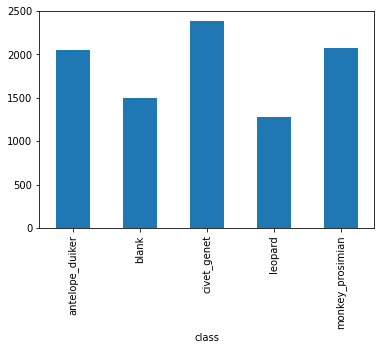

In [9]:
images_counter = df.groupby(["class"])["image"].count()
images_counter.plot(kind="bar")

<AxesSubplot:xlabel='class'>

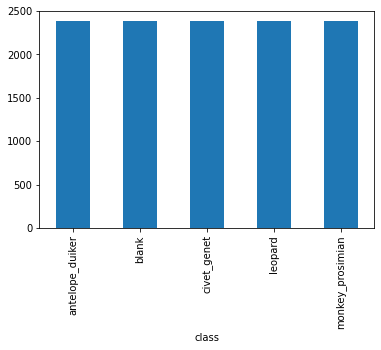

In [10]:
df = pd.concat([df[df["class"]=="antelope_duiker"].sample(max(images_counter)-images_counter["antelope_duiker"]),df])
df = pd.concat([df[df["class"]=="blank"].sample(max(images_counter)-images_counter["blank"]),df])
df = pd.concat([df[df["class"]=="leopard"].sample(max(images_counter)-images_counter["leopard"]),df])
df = pd.concat([df[df["class"]=="monkey_prosimian"].sample(max(images_counter)-images_counter["monkey_prosimian"]),df])
df.groupby(["class"])["image"].count().plot(kind="bar")

## Export dataset

In [11]:
df.to_csv("../data/train_clean_dataset.csv")
df

,site,str_file_path,class,image,filepath,height,width,size,has_correct_exposition
107183,S0157,../data/train_features/ZJ008255.jpg,monkey_prosimian,ZJ008255.jpg,../data/train_features/ZJ008255.jpg,360,640,"(640, 360)",True
111629,S0026,../data/train_features/ZJ012701.jpg,monkey_prosimian,ZJ012701.jpg,../data/train_features/ZJ012701.jpg,360,640,"(640, 360)",True
115246,S0089,../data/train_features/ZJ016318.jpg,monkey_prosimian,ZJ016318.jpg,../data/train_features/ZJ016318.jpg,360,640,"(640, 360)",True
112288,S0036,../data/train_features/ZJ013360.jpg,monkey_prosimian,ZJ013360.jpg,../data/train_features/ZJ013360.jpg,360,640,"(640, 360)",True
104774,S0009,../data/train_features/ZJ005846.jpg,monkey_prosimian,ZJ005846.jpg,../data/train_features/ZJ005846.jpg,360,640,"(640, 360)",True
...,...,...,...,...,...,...,...,...,...
115377,S0022,../data/train_features/ZJ016449.jpg,monkey_prosimian,ZJ016449.jpg,../data/train_features/ZJ016449.jpg,360,640,"(640, 360)",True
115396,S0070,../data/train_features/ZJ016468.jpg,monkey_prosimian,ZJ016468.jpg,../data/train_features/ZJ016468.jpg,540,960,"(960, 540)",True
115397,S0031,../data/train_features/ZJ016469.jpg,monkey_prosimian,ZJ016469.jpg,../data/train_features/ZJ016469.jpg,360,640,"(640, 360)",True
115398,S0002,../data/train_features/ZJ016470.jpg,monkey_prosimian,ZJ016470.jpg,../data/train_features/ZJ016470.jpg,360,640,"(640, 360)",True


## Explore dataset

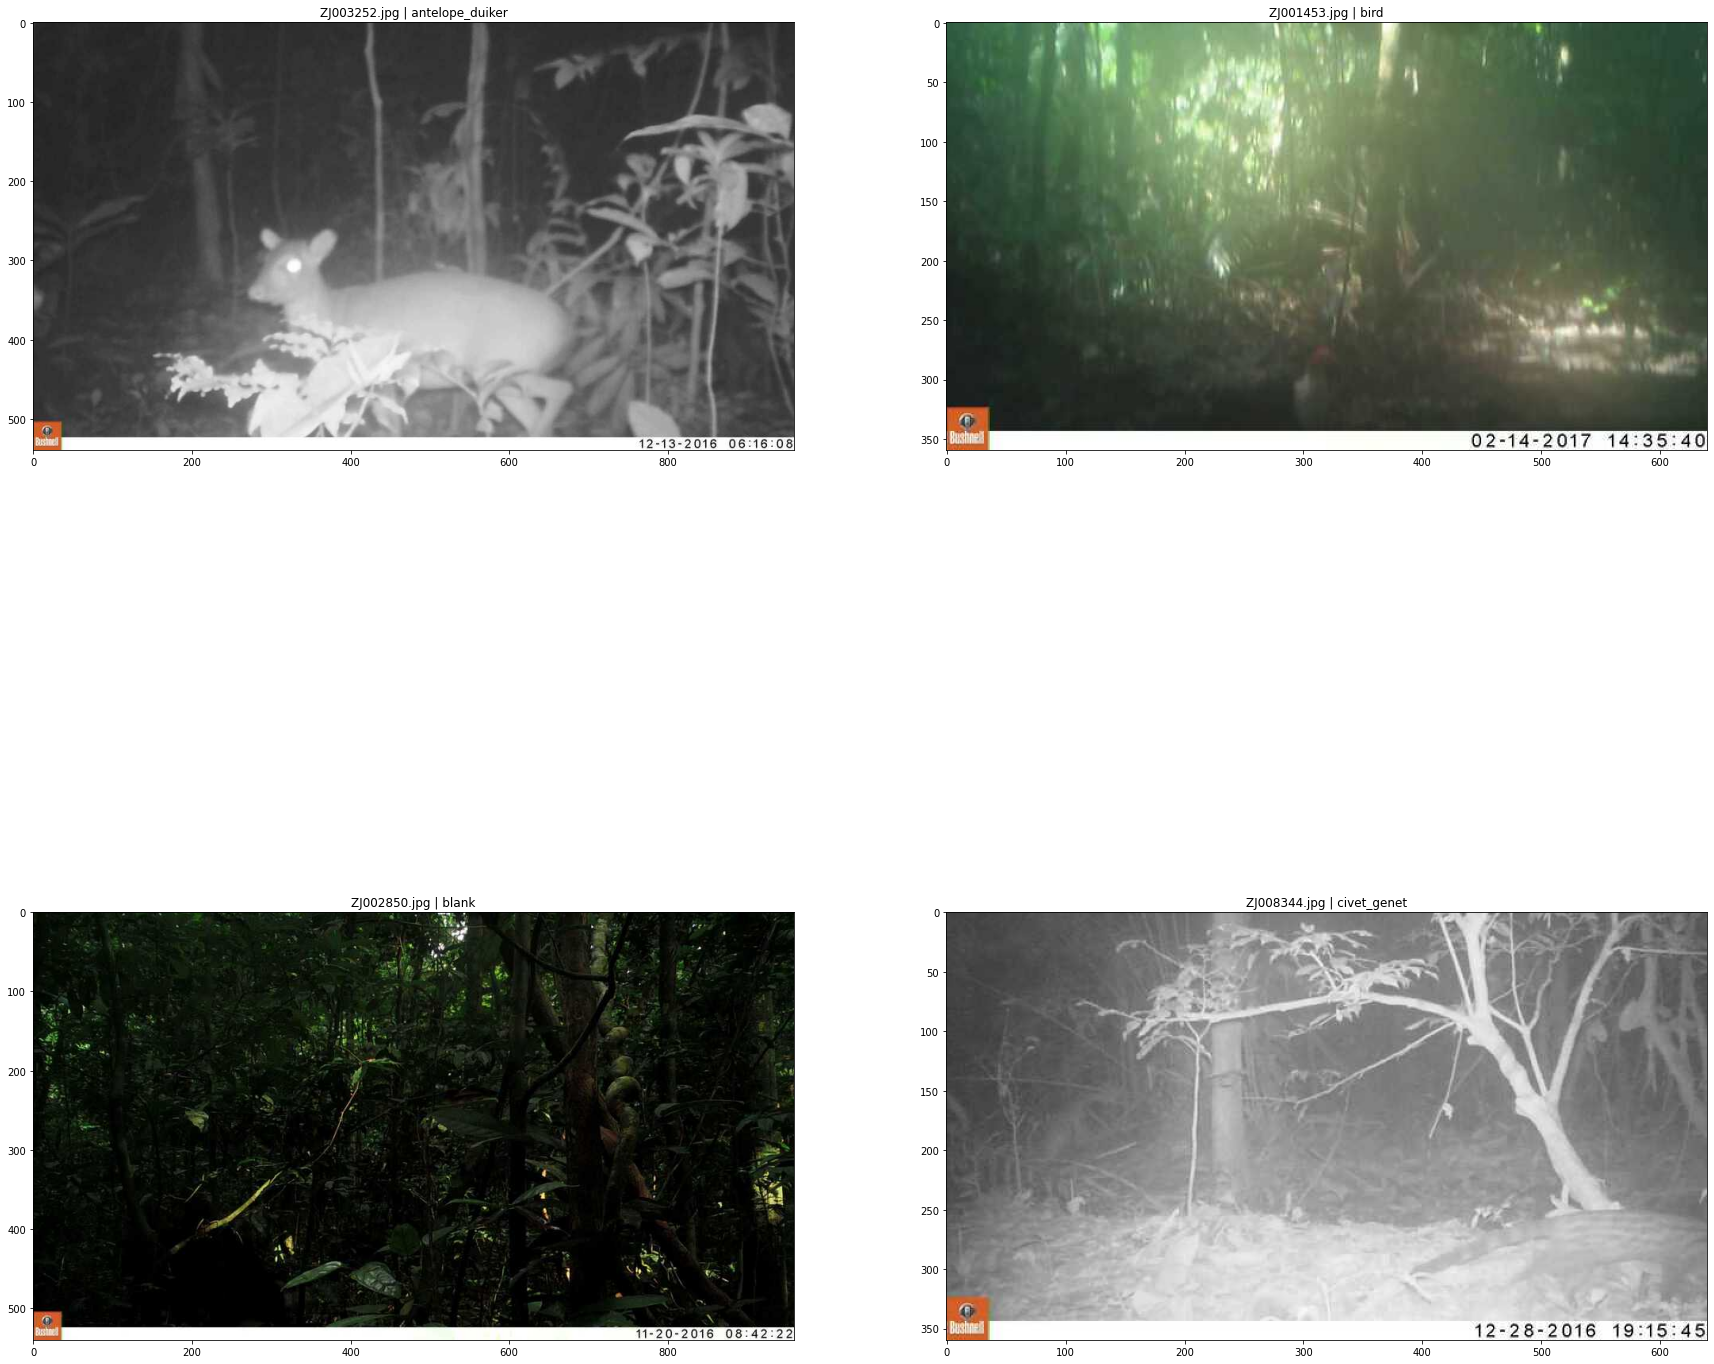

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

random_state = 42

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 30))
supported_labels = sorted(df["class"].unique())
for species, ax in zip(supported_labels, axes.flat):
    random_sample = df[df["class"]==species].sample(1)
    sample_path=random_sample["str_file_path"].values[0]
    sample_name=random_sample["image"].values[0]
    img = mpimg.imread(sample_path)
    ax.imshow(img)
    ax.set_title(f"{sample_name} | {species}")